In [92]:
import sys
sys.path.append('/Users/jackbarlow/OptoTransportAnalysis/src/OptoTransport')
from Data import Data, createMetadataIfNone
from TransportData import TransportData
import matplotlib.pyplot as plt
import numpy
import pandas
import scipy

In [2]:
dat = TransportData()

In [36]:
dat.data["results-5-1"]

,id,Vxx2_D2_X,Vxx1_D2_P,lakeshore_372_ch09_temperature,Vxx2_D2_P,Vxx1_D2_X,Vxx1_D1_P,Vxx1_D1_X,Vxx2_D1_P,Vxx2_D1_X
time,,,,,,,,,,
0.047,5.0,2.362310e-06,0.774045,3.792750,-0.474,3.299004e-06,0.445246,1.207469e-05,0.717916,1.474504e-05
0.250,14.0,2.359990e-06,0.751724,3.791580,-0.318,3.299203e-06,0.455263,1.207491e-05,0.710563,1.474517e-05
0.453,23.0,2.361850e-06,0.743147,3.790170,-0.144,3.298575e-06,0.465191,1.207413e-05,0.704442,1.474610e-05
0.656,32.0,2.368370e-06,0.743726,3.789000,-0.048,3.297454e-06,0.467236,1.207303e-05,0.701698,1.474668e-05
0.859,41.0,2.378610e-06,0.750552,3.789070,-0.090,3.296723e-06,0.465797,1.207236e-05,0.698049,1.474728e-05
...,...,...,...,...,...,...,...,...,...,...
11469.547,492116.0,3.259640e-09,90.261635,0.020021,61.116,-3.120520e-10,-84.958641,1.630191e-09,100.782234,-1.065267e-08
11469.765,492125.0,1.629830e-08,90.144928,0.020022,25.740,-1.165480e-10,-81.158897,3.361958e-09,101.144287,-1.066455e-08
11469.984,492134.0,2.887110e-08,89.545250,0.020021,12.012,6.888290e-10,-75.856987,4.313310e-09,100.401756,-9.829272e-09


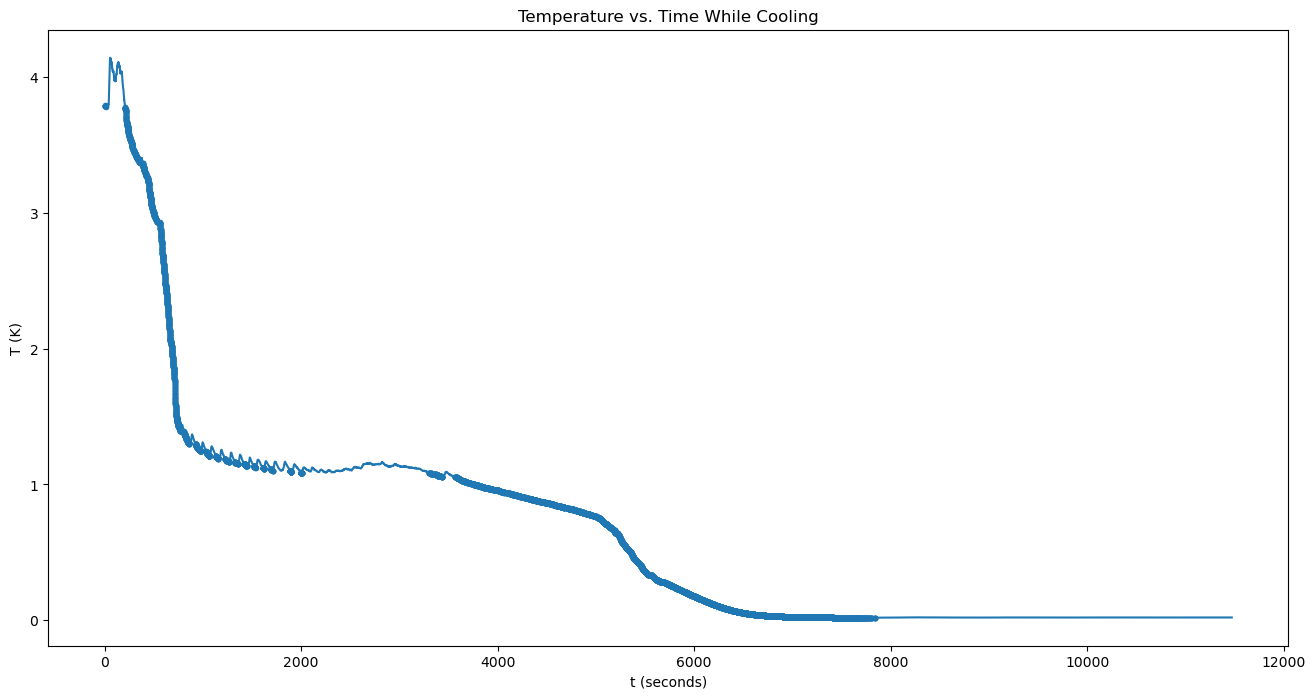

: 

In [116]:
less_than_all_prev = dat.data["results-5-1"]["lakeshore_372_ch09_temperature"] < dat.data["results-5-1"]["lakeshore_372_ch09_temperature"].cummin().shift().astype(float)
fig = plt.figure()
fig.set_size_inches(16, 8)
plt.scatter(dat.data["results-5-1"].where(less_than_all_prev).index, dat.data["results-5-1"]['lakeshore_372_ch09_temperature'].where(less_than_all_prev),marker='.')
plt.plot(dat.data["results-5-1"].index, dat.data["results-5-1"]['lakeshore_372_ch09_temperature'])
plt.xlabel('t (seconds)')
plt.ylabel('T (K)')
plt.title('Temperature vs. Time While Cooling')
plt.show()

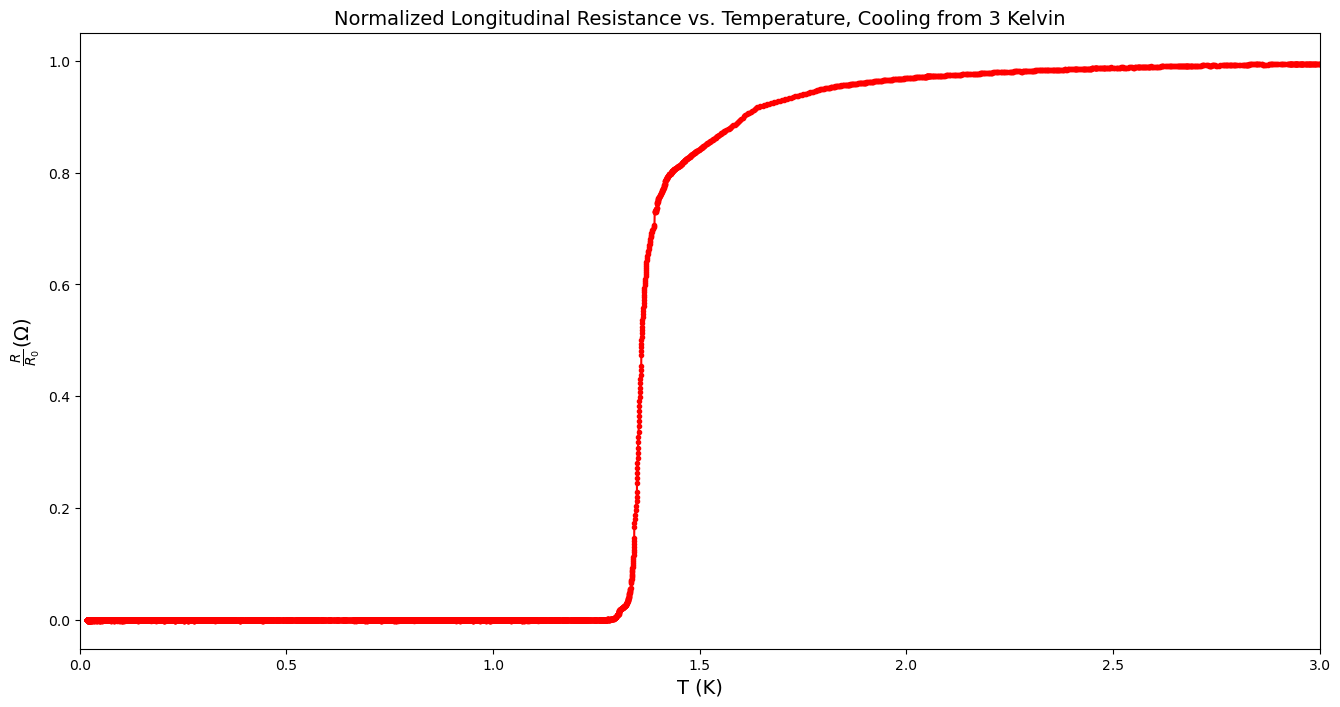

In [111]:
font_options = {'size' : 14}
fig = plt.figure()
fig.set_size_inches(16, 8)
plt.scatter(dat.data["results-5-1"]["lakeshore_372_ch09_temperature"].where(less_than_all_prev).dropna(),
            dat.data["results-5-1"]["Vxx2_D1_X"].where(less_than_all_prev).dropna() / dat.data["results-5-1"]["Vxx2_D1_X"].where(less_than_all_prev).max(),
            color='r', marker='.')
plt.plot(dat.data["results-5-1"]["lakeshore_372_ch09_temperature"].where(less_than_all_prev).dropna(),
         dat.data["results-5-1"]["Vxx2_D1_X"].where(less_than_all_prev).dropna() / dat.data["results-5-1"]["Vxx2_D1_X"].where(less_than_all_prev).max(),
         color='r')
plt.xlabel('T (K)', fontdict=font_options)
plt.ylabel(r'$\frac{R}{R_0} (\Omega)$', fontdict=font_options)
plt.xlim([0, 3])
plt.title('Normalized Longitudinal Resistance vs. Temperature, Cooling from 3 Kelvin', fontdict=font_options)
plt.show()